In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
plt.style.use("ggplot")
sns.set_context("talk")

In [13]:
def load_mss_results():
    msses = [
        "0.00", "0.01", "0.02", "0.03", "0.04",
        "0.05", "0.06", "0.07", "0.08", "0.09",
        "0.10", "0.11", "0.15", "0.20"
    ]
    files = [
        f"../results/tclr_model_testing/all/TD4_MSS{i}_RT_MS_exhaustive/results.pickle" 
        for i in msses
    ]
    results = {i: pd.read_pickle(f) for i, f in zip(msses, files)}
    return results

In [18]:
def calc_scores(results):
    scores = {}
    for mss, res in results.items():
        df = res["simmed_data"]
        mscores = df.groupby("site_name").apply(
            lambda x: r2_score(x["actual"], x["model"])
        )
        mean = mscores.mean()
        std = mscores.std()
        median = mscores.median()
        scores[mss] = {
            "mean": mean,
            "std": std,
            "median": median
        }
    return pd.DataFrame(scores)

In [22]:
results = load_mss_results()
scores = calc_scores(results).T
scores

,mean,std,median
0.00,0.330317,1.485713,0.531492
0.01,0.337881,1.488425,0.553084
0.02,0.518664,0.429847,0.574479
0.03,0.437897,0.687706,0.609130
0.04,0.460183,0.561034,0.589214
0.05,0.357993,0.819749,0.573702
0.06,0.480211,0.590050,0.590932
0.07,0.366789,0.811097,0.557659
0.08,0.363698,0.810603,0.522170
0.09,0.401132,0.726144,0.515240


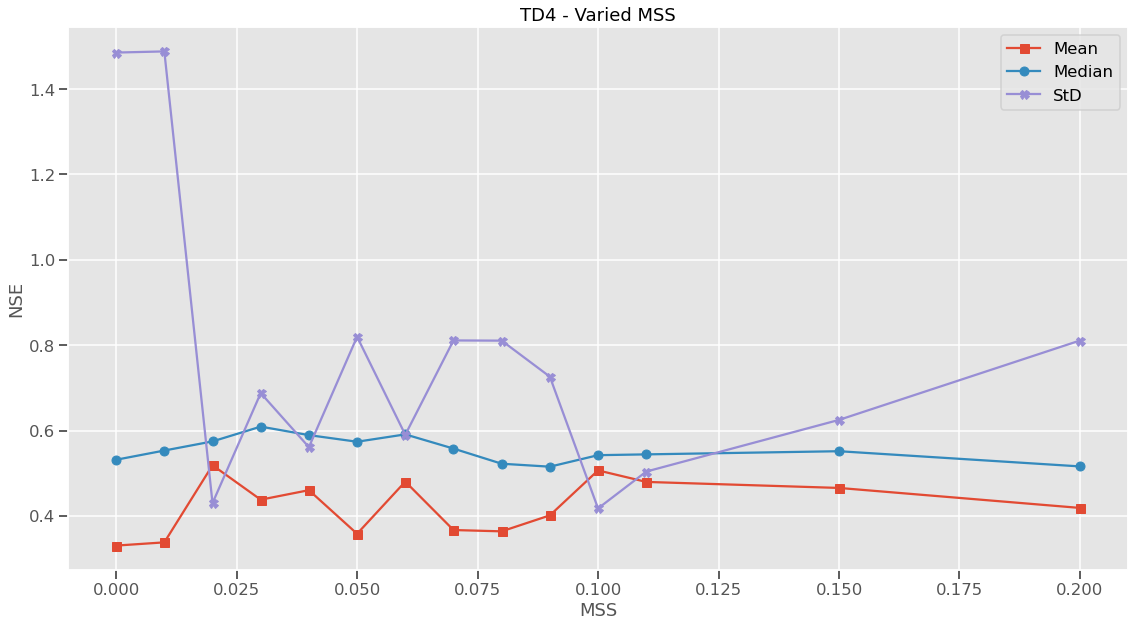

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(19, 10))
scores.index = scores.index.astype(float)
ax.plot(scores.index, scores["mean"], label='Mean', marker="s")
ax.plot(scores.index, scores["median"], label='Median', marker="o")
ax.plot(scores.index, scores["std"], label='StD', marker="X")
ax.set_ylabel("NSE")
ax.set_xlabel("MSS")
ax.set_title("TD4 - Varied MSS")
ax.legend(loc="upper right")
plt.savefig("./figures/mss_line_plot_new.png", dpi=300)
plt.show()

In [28]:
rank = scores.copy()
rank[["mean", "median"]] = rank[["mean", "median"]].rank(ascending=False)
rank["std"] = rank["std"].rank(ascending=True)
rank["score"] = rank.sum(axis=1)
rank.sort_values("score")

,mean,std,median,score
0.02,1.0,2.0,4.0,7.0
0.06,3.0,5.0,2.0,10.0
0.04,6.0,4.0,3.0,13.0
0.10,2.0,1.0,10.0,13.0
0.03,7.0,7.0,1.0,15.0
0.11,4.0,3.0,9.0,16.0
0.15,5.0,6.0,8.0,19.0
0.07,10.0,11.0,6.0,27.0
0.05,12.0,12.0,5.0,29.0
0.09,9.0,8.0,14.0,31.0
